<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
sac_csv = './datasets/sacramento_real_estate_transactions.csv'

In [928]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns

In [929]:
# A
sac_df = pd.read_csv(sac_csv)

In [930]:
sac_df.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [931]:
# A:
# So there is 985 rows and 12 columns
sac_df.shape

(985, 12)

In [932]:
# No null values
sac_df.isna().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [933]:
# As we can see in price there is a -210,994 value and in sq__ft there is a value of -984
sac_df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [934]:
# This drops 
sac_df.drop(sac_df[sac_df['price'] < 0].index, inplace=True)
# sac_df.drop(703, inplace=True)

In [935]:
# Drop all of thsese because there are no values for beds, bath, and sq__ft
sac_df.drop(sac_df[sac_df['sq__ft'] <= 0].index, inplace=True)

In [936]:
# Changing sale date will be helpful
# Also renaming sq__ft column?

In [937]:
# Dropping the value with 'sq__ft' over 5000 and 'price' is 2000
sac_df.drop(sac_df[sac_df['sq__ft'] > 5000].index, inplace = True)

In [938]:
sac_df.shape

(812, 12)

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [939]:
sac_df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [940]:
sac_df.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


In [941]:
# A:
# X = 'zip', 'beds', 'baths', 'sq__ft', 'type'
# y = price


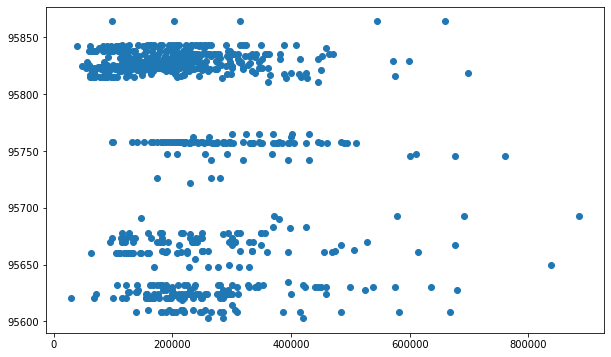

In [942]:
plt.figure(figsize=(10,6))
plt.scatter(sac_df['price'], sac_df['zip']);

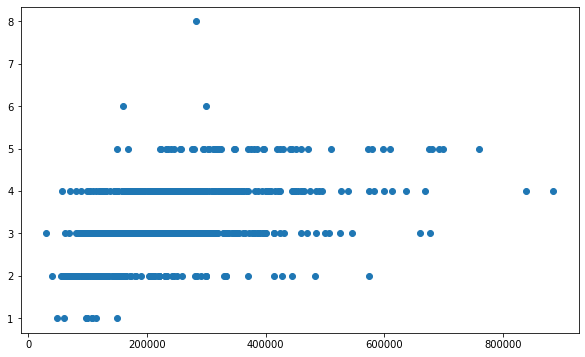

In [943]:
plt.figure(figsize=(10,6))
plt.scatter(sac_df['price'], sac_df['beds']);

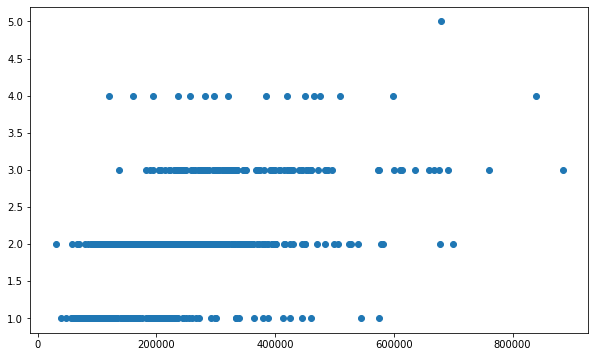

In [944]:
plt.figure(figsize=(10,6))
plt.scatter(sac_df['price'], sac_df['baths']);

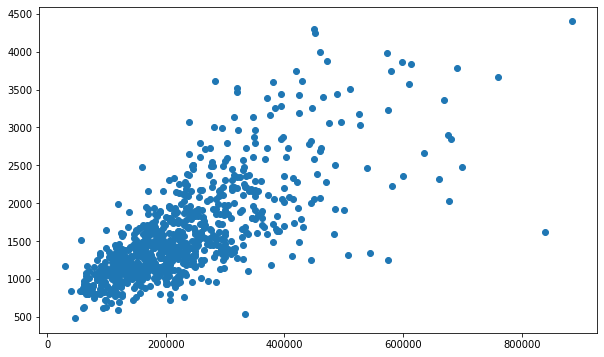

In [945]:
plt.figure(figsize=(10,6))
plt.scatter(sac_df['price'], sac_df['sq__ft']);

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

**A:** 
'sq__ft' would be the best predictor of Y in an SLR model because out of all of the other possible values 'sq__ft' has the most linear relationship with Y which is the price.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [946]:
# This would be Y. That is n length
sac_df['price'].shape

(812,)

In [947]:
# X matrix the is n-by-p
sac_df[['sq__ft']].shape

(812, 1)

In [948]:

def slr_model(X, y):
    
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    X = sac_df[[X]]
    y = sac_df[y]
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
#     Find the intercept
    
    # Take a peek at the model coefficient and intercept
    return score

In [949]:
slr_model('sq__ft', 'price')

0.5312391921867458

### 6. Interpret the intercept. Interpret the slope.

**A:** The intercept is where the line of best fit hits the y axis. However, since we will never have 0 square feet this does not make sense. For every square foot added we are adding 134 to the price.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

**A:** With a very high square footage we can draw an imaginary line across and predict where the line will hit it. With this model we can show what the price could be based for a cetain squarefootage. 

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [950]:
# A:

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [951]:
sac_df['type'].unique()

array(['Residential', 'Condo', 'Multi-Family'], dtype=object)

In [615]:
# sac_dummies = sac_df[['price', 'type']]

In [616]:
# sac_dummies = pd.get_dummies(columns = ['type'], data = sac_dummies, drop_first=True)

In [952]:
sac_dummies = sac_df[['price','type']]
X_new = pd.get_dummies(columns=['type'], data=sac_dummies, drop_first=True)

In [953]:
X_new.head(1)

,price,type_Multi-Family,type_Residential
0,59222,0,1


In [954]:
X_new.shape

(812, 3)

In [620]:
# sac_df['residential'] = pd.get_dummies(sac_df['type'])['Residential']
# sac_df['condo'] = pd.get_dummies(sac_df['type'])['Condo']
# sac_df['multi_family'] = pd.get_dummies(sac_df['type'])['Multi-Family']

In [955]:
sac_df.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


In [956]:
X_new.drop(columns='price',inplace=True)
sac_df = pd.concat([sac_df, X_new],axis=1,sort=False)

In [957]:
sac_df.shape

(812, 14)

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [958]:
# A:


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [959]:
sac_df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude,type_Multi-Family,type_Residential
count,812.000000,812.000000,812.00000,812.000000,812.000000,812.000000,812.000000,812.00000,812.000000
mean,95761.497537,3.247537,1.95936,1586.683498,229751.267241,38.577038,-121.378840,0.01601,0.933498
std,85.365689,0.849490,0.66594,647.477210,119704.946884,0.126393,0.119483,0.12559,0.249312
min,95603.000000,1.000000,1.00000,484.000000,30000.000000,38.241514,-121.550527,0.00000,0.000000
25%,95670.000000,3.000000,2.00000,1144.000000,148750.000000,38.473804,-121.451463,0.00000,1.000000
50%,95820.000000,3.000000,2.00000,1418.500000,207986.500000,38.591720,-121.405456,0.00000,1.000000
75%,95828.000000,4.000000,2.00000,1851.000000,285000.000000,38.675024,-121.326073,0.00000,1.000000
max,95864.000000,8.000000,5.00000,4400.000000,884790.000000,39.008159,-120.597599,1.00000,1.000000


In [960]:
sqft_mean = 1586.683498
sqft_std = 647.477210


In [961]:
huge_house = sqft_mean + (sqft_std*3)
huge_house

3529.1151280000004

In [962]:
sac_dummies = sac_df[['price','type']]
X_new = pd.get_dummies(columns=['type'], data=sac_dummies, drop_first=True)

In [970]:
# https://www.kite.com/python/answers/how-to-convert-a-column-of-booleans-into-integers-in-a-pandas-dataframe-in-python
# https://stackoverflow.com/questions/27239660/pandas-python-create-dummy-variables-for-multiple-conditions
sac_df['huge_houses'] = (sac_df['sq__ft'] >= huge_house) * 1

In [971]:
sac_df.head(1)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential,huge_houses
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1,0


In [972]:
sac_df['zip'].unique()

array([95838, 95823, 95815, 95824, 95841, 95842, 95820, 95670, 95673,
       95822, 95621, 95833, 95660, 95834, 95843, 95832, 95827, 95828,
       95758, 95626, 95825, 95835, 95624, 95632, 95826, 95608, 95662,
       95630, 95829, 95655, 95757, 95726, 95818, 95742, 95683, 95693,
       95831, 95814, 95635, 95864, 95817, 95628, 95667, 95610, 95722,
       95816, 95678, 95747, 95648, 95819, 95811, 95682, 95765, 95661,
       95650, 95821, 95603, 95762, 95677, 95623, 95663, 95746, 95619,
       95614, 95690, 95691])

In [998]:
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
X = sac_df[['beds', 'huge_houses', 'sq__ft', 'zip', 'type_Multi-Family']]
y = sac_df['price']

In [974]:
type(X.shape[1])

int

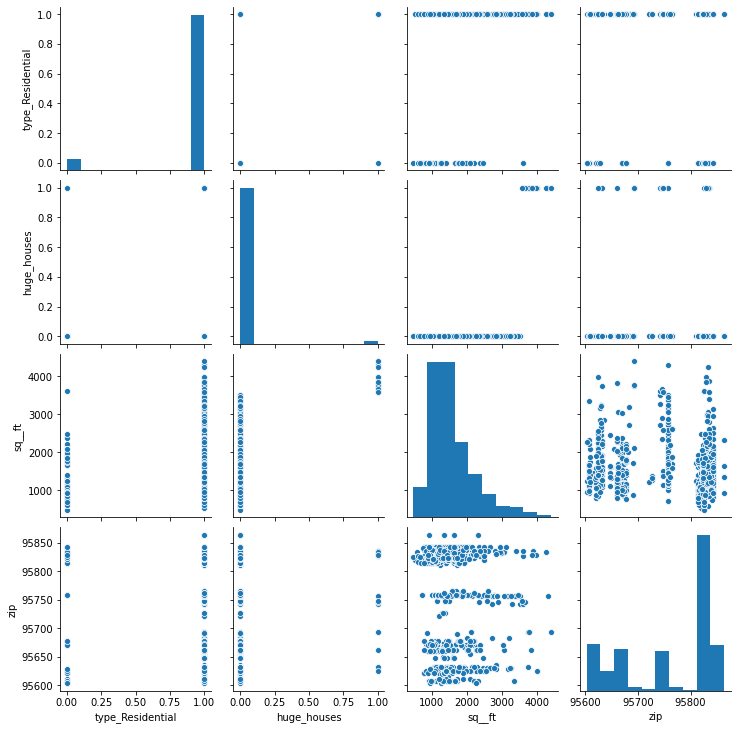

In [975]:
sns.pairplot(X)

In [976]:
#     Instantiate the model
model = LinearRegression()  

In [977]:
 #     Fit the model
model.fit(X, y) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [978]:
y_pred = model.predict(X)
y_pred[:3]

array([118366.93698912, 164196.70911904, 118159.75370409])

In [979]:
metrics.mean_squared_error(y, y_pred, squared=False)

79486.9153229255

In [980]:
print(model.intercept_)
print(model.coef_)

20572299.17764105
[29836.00916384 15332.20816315   128.72184443  -214.85610835]


In [981]:
type(model.score(X, y))

numpy.float64

In [999]:
# Example of another train-test split with a different random state
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y, train_size=.85)

model_2 = LinearRegression()
model_2.fit(X_train_2, y_train_2)

print(model_2.score(X_train_2, y_train_2))
print(model_2.score(X_test_2, y_test_2))

0.5686880576988604
0.5719269132760926


### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

In [983]:
# This is the prediction price
y_pred = model.predict(X_test_2)
y_pred[:10]

array([204229.20273526, 226259.43313803, 145489.45409689, 216241.96274438,
       260849.73542829, 203735.98767237, 252242.45070583, 538790.23891758,
       134545.22001201, 387164.0439275 ])

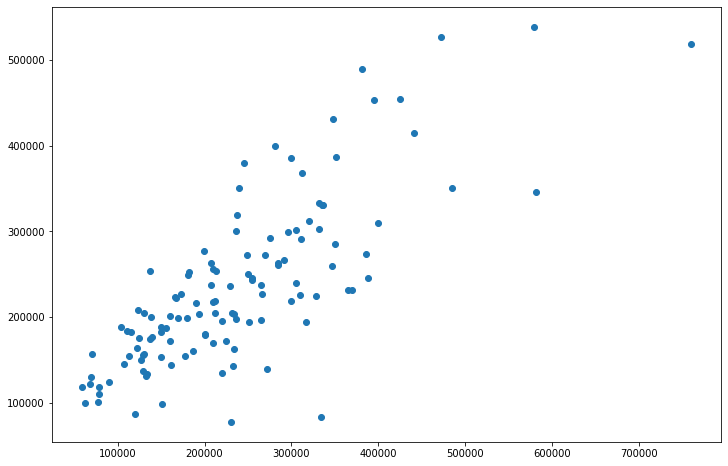

In [984]:
plt.figure(figsize=(12,8))
plt.scatter(y_test_2, y_pred)


### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

#  A: 

There must be a linear relationship between the outcome variable and the independent variables.  Scatterplots can show whether there is a linear or curvilinear relationship.

Multivariate Normality–Multiple regression assumes that the residuals are normally distributed.

No Multicollinearity—Multiple regression assumes that the independent variables are not highly correlated with each other.  This assumption is tested using Variance Inflation Factor (VIF) values.

Homoscedasticity–This assumption states that the variance of error terms are similar across the values of the independent variables.  A plot of standardized residuals versus predicted values can show whether points are equally distributed across all values of the independent variables.

Multiple linear regression requires at least two independent variables, which can be nominal, ordinal, or interval/ratio level variables.  A rule of thumb for the sample size is that regression analysis requires at least 20 cases per independent variable in the analysis. Learn more about sample size here.

https://www.statisticssolutions.com/assumptions-of-multiple-linear-regression/

### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

# A: 

I believe that my model has a linear relationship between the outcome variable and the independent variables. I created a scatter plot to show this relationship.

I believe that in my model there is no multicollinearity. I used sns.pairplot to show the correlation between all of my X variables. There was not correlation making my model have no multicollinearity.

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [985]:
# A:
# David contributed to this
def r2_adj(X, y):
    model_r2 = LinearRegression()
    model.fit(X, y)
    r2 = model.score(X, y)
    r2adj = 1 - ((1 - r2)*(len(X) - 1) / (len(X) - X.shape[1] - 1))
    return r2adj

In [986]:
r2_adj(X_train_2, y_train_2)

0.5478839093595379

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [1000]:
#

def metrics_1(X, y):
    linreg = LinearRegression() # Instantiate the model
    linreg.fit(X, y)            # Fit Model 
    y_pred = linreg.predict(X)  # Predict Model
    mae = metrics.mean_absolute_error(y, y_pred)
    mse = metrics.mean_squared_error(y, y_pred)
    rmse = np.sqrt(metrics.mean_squared_error(y, y_pred))
    mslr = metrics.mean_squared_log_error(y, y_pred)
    r2 = metrics.r2_score(y, y_pred)
    evs = metrics.explained_variance_score(y, y_pred)
    
    print(f"MAE is {mae}")
    print(f"MSE is {mse}")
    print(f"RMSE is {rmse}")
    print(f"MSLR is {mslr}")
    print(f"R2 is {r2}")
    print(f"EVS is {evs}")

In [1001]:
metrics_1(X_train_2, y_train_2)

MAE is 56716.104036715056
MSE is 6298294794.457178
RMSE is 79361.79681973674
MSLR is 0.12151362707527583
R2 is 0.5686880576988604
EVS is 0.5686880576988605


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

**A:**
- With the first model iteration the model has an RMSE of 80668 and an R2 of 0.55.
- On the second model iteration the model performed worse when adding 'type_Multi-Family' as a feature with as RMSE of 79085 and an R2 of 0.56.
- On the third model iteration the model performed about the same as the second iteration while taking out 'type_residental' and adding 'bath'

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
# A:
# 